In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2

from sklearn.datasets import fetch_openml            # common data set access
from sklearn.preprocessing import StandardScaler     # scaling transform
from sklearn.model_selection import train_test_split # validation tools
from sklearn.metrics import zero_one_loss
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDClassifier       # Used in 2D data problems
from sklearn.linear_model import LogisticRegression  # Used in MNIST data problem
from sklearn.linear_model import LogisticRegressionCV

seed = 1234
np.random.seed(seed) 

Part 1: Scaling

In [46]:
# 1. Setup the paths
base_path = "." 
images_folder = os.path.join(base_path, "images")
csv_file = os.path.join(base_path, "legend.csv")

# 2. Read CSV file
df = pd.read_csv(csv_file)

# Lists to store our data
data = []   # This will become X
labels = [] # This will become y

# Define a fixed size for images. For example, MINST is 28*28, here we do 64*64 
IMG_SIZE = 64

print("Loading images... this might take a moment.")

# 3. Loop through the CSV and load images
for index, row in df.iterrows():
    img_name = row['image']
    emotion = row['emotion']

    img_path = os.path.join(images_folder, img_name)

    # Check if file actually exists to avoid errors
    if os.path.exists(img_path):
        # Load image in Grayscale (usually sufficient for emotion detection)
        # If you want color, remove the second argument.
        img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img_array is not None:
            # Resize the image (Crucial step!)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            
            # Flatten the image
            # This converts the 2D image (64x64) into a 1D row of numbers (4096,)
            # This matches the format your professor used for X
            flat_array = new_array.flatten()
            
            data.append(flat_array)
            labels.append(emotion)

# 4. Convert to Numpy Arrays (X and y)
X = np.array(data)
y = np.array(labels)

print("Data loaded successfully!")
print(f"Features (X) shape: {X.shape}") # Should be (Number of images, 4096)
print(f"Labels (y) shape: {y.shape}")    # Should be (Number of images,)


Loading images... this might take a moment.
Data loaded successfully!
Features (X) shape: (13690, 4096)
Labels (y) shape: (13690,)


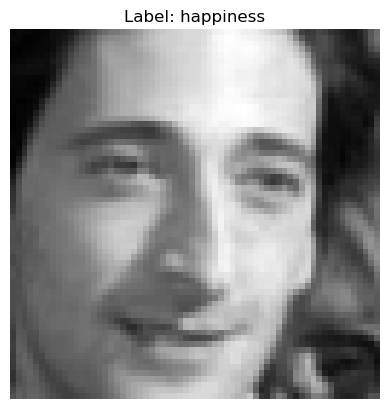

anger: 252
contempt: 9
disgust: 208
fear: 21
happiness: 5696
neutral: 6868
sadness: 268
suprise: 368


In [61]:
# Visualization Check
idx = 100 # you can see any image by changing index from image folder
plt.imshow(X[idx].reshape(64, 64), cmap='gray')
plt.title(f"Label: {y[idx]}") # This will show the integer label
plt.axis('off')
plt.show()

# the number of labels for each type
unique_label = np.unique(y)
for label in unique_label:
    print(f'{label}: {np.sum(y == label)}')

In [48]:
# 10% data is used as testing data
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, random_state=seed, shuffle=True)

# Scaling
scaler = StandardScaler()
scaler.fit(X_tr)
X_tr = scaler.transform(X_tr)     # We can forget about the original values & work
X_te = scaler.transform(X_te)

Train Logistic Regression

In [69]:
logreg_cv = LogisticRegressionCV(
    Cs=[0.001, 0.01, 0.1, 1, 10, 100], # The values to explore
    cv=5,                              # Split training data into 5 folds
    class_weight='balanced',           # Handle the "Disgust" imbalance
    max_iter=1000,
    random_state=seed
)

logreg_cv.fit(X_tr, y_tr)

y_tr_pred = logreg_cv.predict(X_tr)
y_te_pred = logreg_cv.predict(X_te)
y_tr_error_rate = np.mean(y_tr != y_tr_pred)
y_te_error_rate = np.mean(y_te != y_te_pred)



KeyboardInterrupt: 

In [66]:
print(y_tr_error_rate)
print(y_te_error_rate)

0.23106890674458241
0.33820306793279764
